In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import cv2
import os
import re

In [2]:
# getting file names
frames = os.listdir('frames/')
frames.sort(key=lambda f: int(re.sub('\D','',f)))

In [3]:
# loading frames
images = []
for i in tqdm_notebook(frames):
    img = cv2.imread('frames/'+i)
    images.append(img)

C:\Users\chakr\AppData\Local\Temp/ipykernel_18816/98662702.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(frames):


  0%|          | 0/1108 [00:00<?, ?it/s]

In [18]:
# random frame index
index = 1022

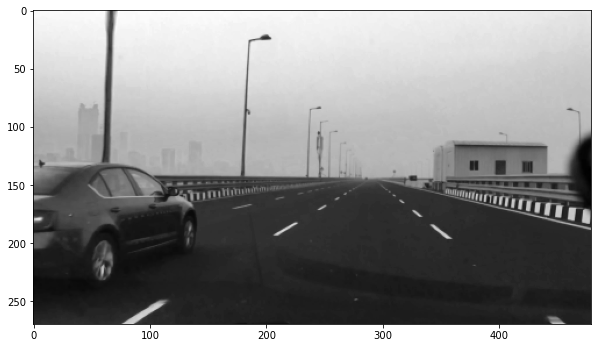

In [19]:
# plot frame
plt.figure(figsize=(10,10))
plt.imshow(images[index][:,:,0],cmap="gray")
plt.show()

In [20]:
# frame mask
# create a zero array
stencil = np.zeros_like(images[index][:,:,0])

In [21]:
# specify coordinates of the polygon
polygon = np.array([[50,270],[220,160],[360,160],[480,270]])

In [22]:
# fill polygon with ones
cv2.fillConvexPoly(stencil, polygon, 1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

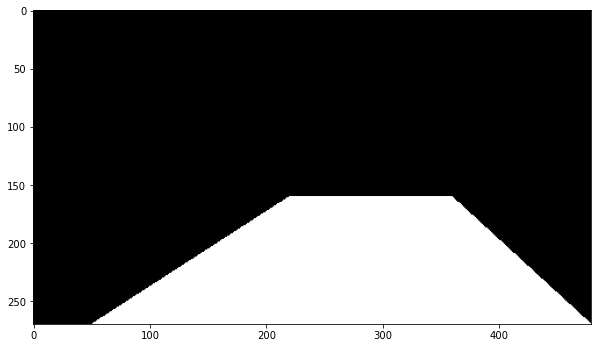

In [23]:
# plot polygon
plt.figure(figsize=(10,10))
plt.imshow(stencil, cmap="gray")
plt.show()

In [24]:
# apply polygon as a mask on the frame
img = cv2.bitwise_and(images[index][:,:,0],images[index][:,:,0],mask=stencil)

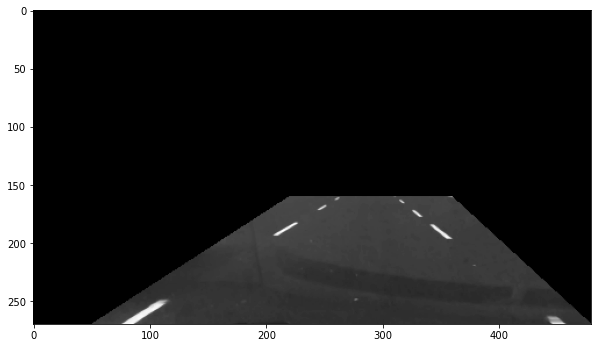

In [25]:
# plot masked frame 
plt.figure(figsize=(10,10))
plt.imshow(img,cmap="gray")
plt.show()

In [26]:
# create pre-processing
# apply image thresholding
ret, thresh = cv2.threshold(img, 130, 145, cv2.THRESH_BINARY)

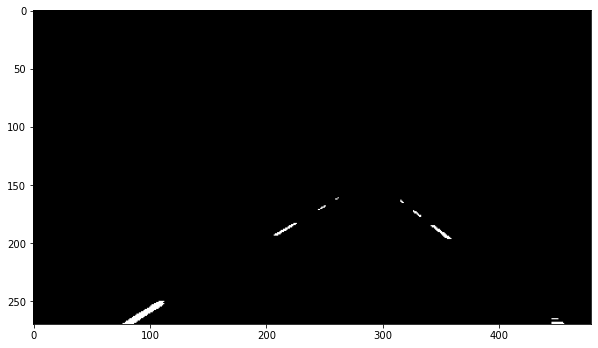

In [27]:
# plot image
plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap="gray")
plt.show()

In [28]:
# hough transformation
lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, 
                        maxLineGap=200)
# create a copy of the original frame
dmy = images[index][:,:,0].copy()

In [29]:
# draw hough lines
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(dmy,(x1,y1),(x2,y2),(255,0,0),3)

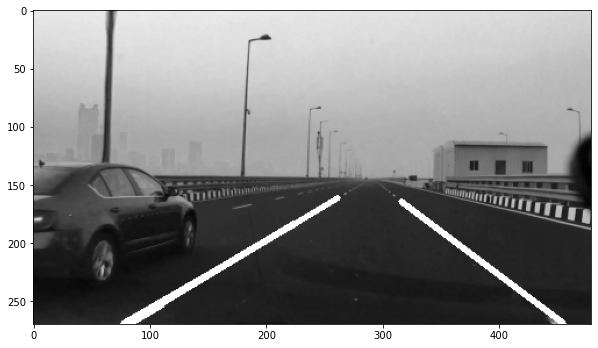

In [30]:
# plot frame
plt.figure(figsize=(10,10))
plt.imshow(dmy, cmap="gray")
plt.show()